# Task 1: Subjectivity in News Articles

## Task Description

Systems are challenged to distinguish whether a sentence from a news article expresses the subjective view of the author behind it or presents an objective view on the covered topic instead.
This is a binary classification tasks in which systems have to identify whether a text sequence (a sentence or a paragraph) is subjective (SUBJ) or objective (OBJ).
The task comprises three settings:

* Monolingual: train and test on data in a given language L

* Multilingual: train and test on data comprising several languages

* Zero-shot: train on several languages and test on unseen languages

### Contents of the Task 1 Directory

* Main folder: data

  Contains a subfolder for each language which contain the data as TSV format with .tsv extension (train_LANG.tsv, dev_LANG.tsv, dev_test_LANG.tsv, test_LANG.tsv). As LANG we used standard language code for each language.

* Main folder: baseline

  Contains a single file, baseline.py, used to train a baseline and provide predictions.

* Main folder: scorer

  Contains a single file, evaluate.py, that checks the format of a submission and evaluate the various metrics.

### Input Data Format
The data will be provided as a TSV file with three columns:

    sentence_id  sentence  label

Where:

* sentence_id: sentence id for a given sentence in a news article

* sentence: sentence's text

* label: OBJ and SUBJ


Examples:

    b9e1635a-72aa-467f-86d6-f56ef09f62c3  Gone are the days when they led the world in recession-busting SUBJ
    f99b5143-70d2-494a-a2f5-c68f10d09d0a  The trend is expected to reverse as soon as next month.  OBJ

### Output Data Format
The output must be a TSV format with two columns: sentence_id and label.

### Evaluation Metrics
This task is evaluated as a classification task. We will use the F1-macro measure for the ranking of teams.
We will also measure Precision, Recall, and F1 of the SUBJ class and the macro-averaged scores.


### Scorers
To evaluate the output of your model which should be in the output format required, please run the script below:

    python evaluate.py -g dev_truth.tsv -p dev_predicted.tsv

where dev_predicted.tsv is the output of your model on the dev set, and dev_truth.tsv is the golden label file provided by us.
The file can be used also to validate the format of the submission, simply use the provided test file as gold data.
The evaluation will not be performed, but the format of your input will be checked.

### Baselines
The script to train the baseline is provided in the related directory.
The script can be run as follow:

    python baseline.py -trp train_data.tsv -ttp dev_data.tsv

where train_data.tsv is the file to be used for training and dev_data.tsv is the file on which doing the prediction.
The baseline is a logistic regressor trained on a Sentence-BERT multilingual representation of the data.

## Data Loading

In [1]:
!apt-get install git-lfs -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!git clone https://gitlab.com/checkthat_lab/clef2025-checkthat-lab.git

Cloning into 'clef2025-checkthat-lab'...
remote: Enumerating objects: 862, done.
remote: Counting objects: 100% (841/841), done.
remote: Compressing objects: 100% (422/422), done.
remote: Total 862 (delta 410), reused 831 (delta 406), pack-reused 21 (from 1)
Receiving objects: 100% (862/862), 78.96 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (414/414), done.
Updating files: 100% (181/181), done.


In [3]:
# !pip install pandas

In [4]:
DATA_PATH = "clef2025-checkthat-lab/task1/data"
SCORER_PATH = "clef2025-checkthat-lab/task1/scorer"

In [ ]:
DATA_PATH = "data"
SCORER_PATH = "scorer"

In [5]:
import pandas as pd

In [6]:
# ARABIC
train_path = f'{DATA_PATH}/arabic/train_ar.tsv'
dev_path = f'{DATA_PATH}/arabic/dev_ar.tsv'

df_train_ar = pd.read_csv(train_path, sep='\t')
df_dev_ar = pd.read_csv(dev_path, sep='\t')

# BULGARIAN
train_path = f'{DATA_PATH}/bulgarian/train_bg.tsv'
dev_path = f'{DATA_PATH}/bulgarian/dev_bg.tsv'

df_train_bg = pd.read_csv(train_path, sep='\t')
df_dev_bg = pd.read_csv(dev_path, sep='\t')

# ENGLISH
train_path = f'{DATA_PATH}/english/train_en.tsv'
dev_path = f'{DATA_PATH}/english/dev_en.tsv'

df_train_en = pd.read_csv(train_path, sep='\t')
df_dev_en = pd.read_csv(dev_path, sep='\t')

# GERMAN
train_path = f'{DATA_PATH}/german/train_de.tsv'
dev_path = f'{DATA_PATH}/german/dev_de.tsv'

df_train_de = pd.read_csv(train_path, sep='\t')
df_dev_de = pd.read_csv(dev_path, sep='\t')

# ITALIAN
train_path = f'{DATA_PATH}/italian/train_it.tsv'
dev_path = f'{DATA_PATH}/italian/dev_it.tsv'

df_train_it = pd.read_csv(train_path, sep='\t')
df_dev_it = pd.read_csv(dev_path, sep='\t')

# MONOLINGUAL - TEST ON ENGLISH AND ITALIAN
test_path = f'{DATA_PATH}/english/test_en_labeled.tsv'
df_test_en = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/italian/test_it_labeled.tsv'
df_test_it = pd.read_csv(test_path, sep='\t')

# MULTILINGUAL - TEST ON ARABIC, BULGARIAN, ENGLISH, GERMAN AND ITALIAN
test_path = f'{DATA_PATH}/multilingual/test_multilingual_labeled.tsv'

df_test_multi = pd.read_csv(test_path, sep='\t')

# ZERO-SHOT - TEST ON GREEK, POLISH, ROMANIAN AND UKRAINIAN
test_path = f'{DATA_PATH}/greek/test_gr_labeled.tsv'
df_test_gr = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/polish/test_pol_labeled.tsv'
df_test_pol = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/romanian/test_ro_labeled.tsv'
df_test_ro = pd.read_csv(test_path, sep='\t')

test_path = f'{DATA_PATH}/ukrainian/test_ukr_labeled.tsv'
df_test_ukr = pd.read_csv(test_path, sep='\t')

In [7]:
# Keep only the required columns
df_train_en = df_train_en[['sentence_id', 'sentence', 'label']]
df_dev_en = df_dev_en[['sentence_id', 'sentence', 'label']]

# Encode labels: OBJ -> 1, SUBJ -> 0
df_train_ar['label'] = df_train_ar['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_ar['label'] = df_dev_ar['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_bg['label'] = df_train_bg['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_bg['label'] = df_dev_bg['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_en['label'] = df_train_en['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_en['label'] = df_dev_en['label'].map({'OBJ': 1, 'SUBJ': 0})
df_test_en['label'] = df_test_en['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_de['label'] = df_train_de['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_de['label'] = df_dev_de['label'].map({'OBJ': 1, 'SUBJ': 0})

df_train_it['label'] = df_train_it['label'].map({'OBJ': 1, 'SUBJ': 0})
df_dev_it['label'] = df_dev_it['label'].map({'OBJ': 1, 'SUBJ': 0})
df_test_it['label'] = df_test_it['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_multi['label'] = df_test_multi['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_gr['label'] = df_test_gr['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_pol['label'] = df_test_pol['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_ro['label'] = df_test_ro['label'].map({'OBJ': 1, 'SUBJ': 0})

df_test_ukr['label'] = df_test_ukr['label'].map({'OBJ': 1, 'SUBJ': 0})

<ipython-input-7-42071ef08fce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_en['label'] = df_train_en['label'].map({'OBJ': 1, 'SUBJ': 0})
<ipython-input-7-42071ef08fce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev_en['label'] = df_dev_en['label'].map({'OBJ': 1, 'SUBJ': 0})


In [8]:
def print_shape(df1, df2, df3):
    """
    Utility function to print the shape of the three dataframes
    """
    if df1 is not None:
        print("Train dataframe:    {} rows and {} columns".format(df1.shape[0], df1.shape[1]))
    if df2 is not None:
        print("Dev dataframe:       {} rows and {} columns".format(df2.shape[0], df2.shape[1]))
    if df3 is not None:
        print("Test dataframe:      {} rows and {} columns".format(df3.shape[0], df3.shape[1]))
    print("--------------------------------------------")

In [9]:
print("ARABIC")
print_shape(df_train_ar, df_dev_ar, None)
print("BULGARIAN")
print_shape(df_train_bg, df_dev_bg, None)
print("ENGLISH")
print_shape(df_train_en, df_dev_en, df_test_en)
print("GERMAN")
print_shape(df_train_de, df_dev_de, None)
print("ITALIAN")
print_shape(df_train_it, df_dev_it, df_test_it)
print("MULTILINGUAL")
print_shape(None, None, df_test_multi)
print("GREEK")
print_shape(None, None, df_test_gr)
print("POLISH")
print_shape(None, None, df_test_pol)
print("ROMANIAN")
print_shape(None, None, df_test_ro)
print("UKRAINIAN")
print_shape(None, None, df_test_ukr)

ARABIC
Train dataframe:    2446 rows and 3 columns
Dev dataframe:       467 rows and 3 columns
--------------------------------------------
BULGARIAN
Train dataframe:    691 rows and 3 columns
Dev dataframe:       306 rows and 3 columns
--------------------------------------------
ENGLISH
Train dataframe:    830 rows and 3 columns
Dev dataframe:       462 rows and 3 columns
Test dataframe:      300 rows and 3 columns
--------------------------------------------
GERMAN
Train dataframe:    800 rows and 3 columns
Dev dataframe:       491 rows and 3 columns
--------------------------------------------
ITALIAN
Train dataframe:    1613 rows and 3 columns
Dev dataframe:       667 rows and 3 columns
Test dataframe:      299 rows and 3 columns
--------------------------------------------
MULTILINGUAL
Test dataframe:      1982 rows and 3 columns
--------------------------------------------
GREEK
Test dataframe:      284 rows and 3 columns
--------------------------------------------
POLISH
Test 

In [10]:
# Keep the original sentence for error analysis
original_sentence_en = df_test_en["sentence"]
# Keep the original sentence for error analysis
original_sentence_it = df_test_it["sentence"]

### Utils

In [11]:
def plot_confusion_matrix(model, results):
    cm = confusion_matrix(results["true_label"], results["predicted_label"], labels=[0, 1])
    cmd = ConfusionMatrixDisplay(cm, display_labels=["Subjective", "Objective"])
    cmd.plot(cmap="Blues")
    plt.xlabel('Predicted Label', fontsize=18, labelpad=14)
    plt.ylabel('True Label', fontsize=18, labelpad=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#    plt.title(f"{model}: Confusion Matrix")
#    plt.savefig(f"outputs/cm_{model}.png", bbox_inches='tight')
    plt.show()

    cm = confusion_matrix(results["true_label"], results["predicted_label"], labels=[0, 1], normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=["Subjective", "Objective"])
    cmd.plot(cmap="Blues")
    plt.xlabel('Predicted Label', fontsize=18, labelpad=14)
    plt.ylabel('True Label', fontsize=18, labelpad=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#    plt.title(f"{model}: Normalized Confusion Matrix")
#    plt.savefig(f"outputs/cm_{model}_norm.png", bbox_inches='tight')
    plt.show()

def plot_precision_recall_curve(model, precision, recall, average_precision):
    # Plot the Precision-Recall curve
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model}: Precision-Recall Curve (AP = {average_precision:.2f})')
    # plt.savefig(f"outputs/pr_curve_{model}.png")
    plt.show()

## Solution 1: Transformer

### Utils

In [12]:
# !pip install transformers
# !pip install datasets
# !pip install accelerate -U
!pip install evaluate
# !pip install bitsandbytes
# !pip install tf-keras
# !pip install sentencepiece
# !pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.3 MB/s eta 0:00:00


In [13]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import shutil
import torch

from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True, padding=True)

# Metrics
f1_metric = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    result = f1_metric.compute(predictions=preds, references=labels, average="macro")
    return {"f1_macro": result["f1"]}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [15]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available.")

GPU is available: Tesla T4


### Monolingual

#### English

In [16]:
dataset_train = Dataset.from_pandas(df_train_en)
dataset_val = Dataset.from_pandas(df_dev_en)
dataset_test = Dataset.from_pandas(df_test_en)

In [17]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")

tokenized_train = dataset_train.map(preprocess_function, batched=True)
tokenized_val = dataset_val.map(preprocess_function, batched=True)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/830 [00:00<?, ? examples/s]

Map:   0%|          | 0/462 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [18]:
# Load model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=2)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="logs",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    report_to="none",
)

In [20]:
# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [21]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [22]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [23]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.641177,0.660801
2,No log,0.557297,0.744610
3,No log,0.602015,0.723727


TrainOutput(global_step=156, training_loss=0.4562802926087991, metrics={'train_runtime': 2582.7149, 'train_samples_per_second': 0.964, 'train_steps_per_second': 0.06, 'total_flos': 101143515930840.0, 'train_loss': 0.4562802926087991, 'epoch': 3.0})

In [24]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.55729740858078, 'eval_f1_macro': 0.7446102819237148, 'eval_runtime': 68.4005, 'eval_samples_per_second': 6.754, 'eval_steps_per_second': 0.424, 'epoch': 3.0}


In [25]:
# Save model
trainer.save_model("distilmbert-subjectivity-en")

In [26]:
# Test Evaluation
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_en["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("mono_en_test_predictions.tsv", sep="\t", index=False)

In [27]:
# Run scorer
# !python scorer/evaluate.py -g data/english/test_en_labeled.tsv -p mono_en_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/english/test_en_labeled.tsv \
    -p mono_en_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6961
            macro-P: 0.6894
            macro-R: 0.7083
            
            SUBJ-F1: 0.5806
            SUBJ-P: 0.5347
            SUBJ-R: 0.6353
            
            accuracy: 0.7400
        


#### Error Analysis

In [28]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [29]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_en["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [30]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (distilmbert): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (distilmbert): 31

EXAMPLES:

	That sounds worryingly similar to the vainglorious delivery timetable once claimed during the sorry saga called HS2.

	If Timbaland releases a number one hit soon, we can get the full 2006 experience again.

	The release this week of the new Chinese artificial intelligence (AI) tool, DeepSeek-R1, is one such moment.

	She complains of an ‘illness’, though we’re not sure whether it’s physical or mental: it seems porous, like it has seeped into every cell of her body.

	Cuba Sí, Bloqueo No

	HS2 was not a failure because it included a tunnel or because it attempted to protect animal life; it failed because rail privatisation stripped the UK of the skills and public capacity to develop large-scale projects.

	Andersson is rigidly focused on the ‘stuff people care about.’

	Arbitrary cuts to migration, which Reeves touted in her speech, pose challenges for sectors where there are already labour shortages, including construction.

	Th

In [31]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (distilmbert): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (distilmbert): 47

EXAMPLES:

	But Andersson is adamant that what she calls ‘red green’ politics is the only way forward — for both pragmatic and ideological reasons.

	I need  no, crave  more silence in my life.

	Walking through Havana, the scars of economic warfare are visible everywhere.

	But she is adamant that the European left has to put aside its differences and try to work together.

	I would soothe my loneliness and isolation in the evenings by playing endless hours of Law & Order: Special Victims Unit just for the ambient sound – the comfort of Detectives Olivia Benson and Elliot Stabler bringing criminals of the worst kind to justice.

	Another opponent then is still a dissenter now.

	It must look elsewhere to make up for lost Russian gas.

	Many inside and outside Cuba describe it as genocidal, designed to stifle the Cuban people and serve as a warning to any nation considering alternative economic paths.

	But here we can really see what thes

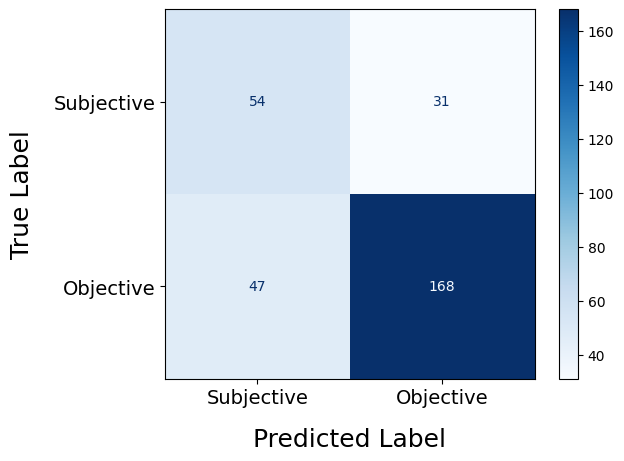

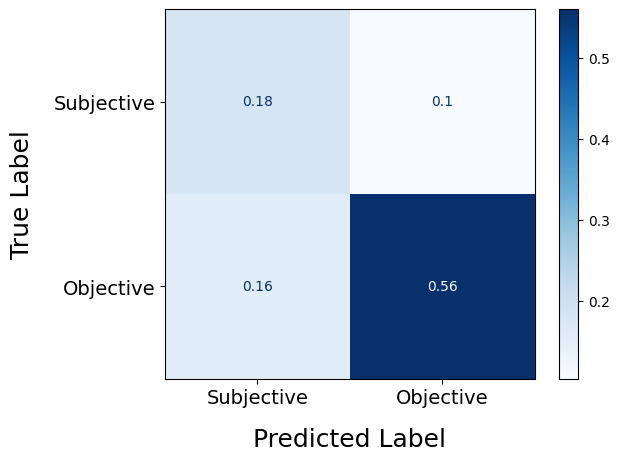

In [32]:
plot_confusion_matrix("distilmbert", test_results)

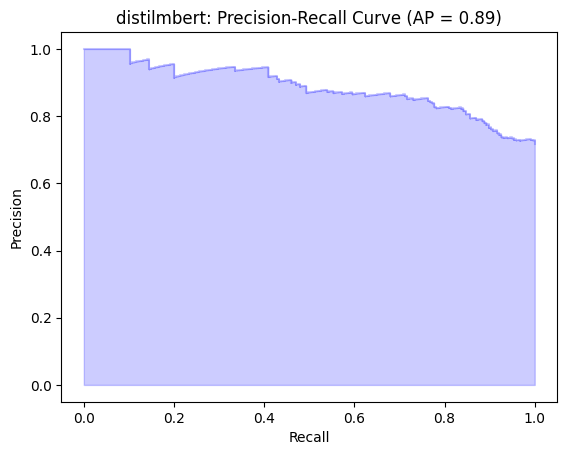

In [33]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

#### Italian

In [34]:
dataset_train = Dataset.from_pandas(df_train_it)
dataset_val = Dataset.from_pandas(df_dev_it)
dataset_test = Dataset.from_pandas(df_test_it)

In [35]:
# Tokenization
tokenized_train = dataset_train.map(preprocess_function, batched=True)
tokenized_val = dataset_val.map(preprocess_function, batched=True)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/1613 [00:00<?, ? examples/s]

Map:   0%|          | 0/667 [00:00<?, ? examples/s]

Map:   0%|          | 0/299 [00:00<?, ? examples/s]

In [36]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [37]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.471271,0.696496
2,No log,0.531301,0.704874
3,No log,0.584320,0.701144


TrainOutput(global_step=303, training_loss=0.3169108223993786, metrics={'train_runtime': 5130.8082, 'train_samples_per_second': 0.943, 'train_steps_per_second': 0.059, 'total_flos': 184039906422204.0, 'train_loss': 0.3169108223993786, 'epoch': 3.0})

In [38]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [39]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.5313012599945068, 'eval_f1_macro': 0.7048744120642002, 'eval_runtime': 274.2783, 'eval_samples_per_second': 2.432, 'eval_steps_per_second': 0.153, 'epoch': 3.0}


In [40]:
# Save model
trainer.save_model("distilmbert-subjectivity-it")

In [41]:
# Test Evaluation
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_it["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("mono_it_test_predictions.tsv", sep="\t", index=False)

In [42]:
# Run scorer
# !python scorer/evaluate.py -g data/italian/test_it_labeled.tsv -p mono_it_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/italian/test_it_labeled.tsv \
    -p mono_it_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6957
            macro-P: 0.7213
            macro-R: 0.6872
            
            SUBJ-F1: 0.5806
            SUBJ-P: 0.6835
            SUBJ-R: 0.5047
            
            accuracy: 0.7391
        


#### Error Analysis

In [43]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [44]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_it["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [45]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (distilmbert): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (distilmbert): 53

EXAMPLES:

	Nelle dolomiti c'è posto per tutti.

	L'ostentazione della burineria e servizi montani penosi.

	Poi il leader M5S è durissimo con il ministro Nordio:

	Conte infanga Meloni?

	Il Repower-EU ha provato a tracciare la rotta in merito all’indipendenza energetica, che tutto è tranne che autosufficienza dell’UE.

	@779 le dolomiti del Brenta la sera con sole che scende in fondo alla val Rendena crea un tramonto montano rosa ed arancione che non ha eguali al mondo.

	Poi fatte le olimpiadi verrà abbondonata.

	Si tratta di un contributo consistente, ma non essenziale:

	La maggior parte dei cittadini e delle società svizzere non ha niente da perdere dalla totale trasparenza finanziaria e di certo preferirebbe la fine dell’evasione fiscale offshore alle costanti critiche al proprio Paese.

	Saranno contenti gli italiani seguaci devoti di Trump.



In [46]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (distilmbert): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (distilmbert): 25

EXAMPLES:

	Dalla premier "viltà istituzionale".

	Dare del tu e chiamarsi per nome, a seconda del contesto, della relazione esistente tra i parlanti, e di molti altri fattori variabili, possono essere un modo per esprimere empatia oppure un modo di interloquire inappropriato e irrispettoso.

	In questo quadro di competizione e guerra che coinvolge innanzitutto il mercato energetico, la narrazione Italiana costruita dal Governo Meloni sulla “sicurezza energetica” si inserisce perfettamente.

	E' quindi ipotizzabile che si assista a una fase in cui oro e dollaro si muovono nella stessa direzione, senza necessariamente influenzarsi a vicenda.

	L’attitudine a darsi del tu e chiamarsi per nome più spesso che in passato non implica che sia sempre appropriato e inoffensivo farlo

	La spesa che non c'è

	quando il dollaro si rafforza, loro tende a indebolirsi.

	Sarebbe quindi una coalizione contro cui la Svizzera non avrebbe interesse a combatte

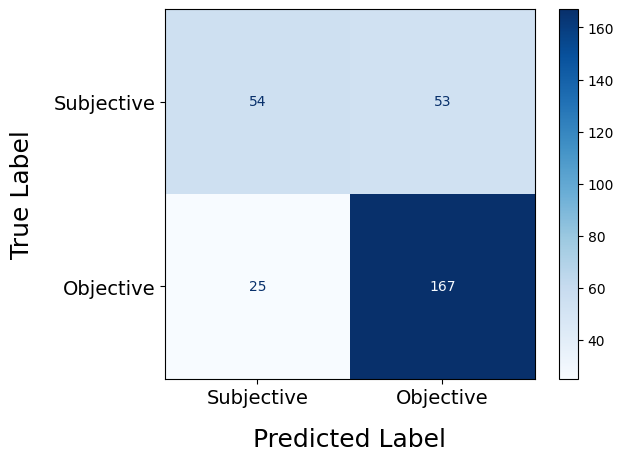

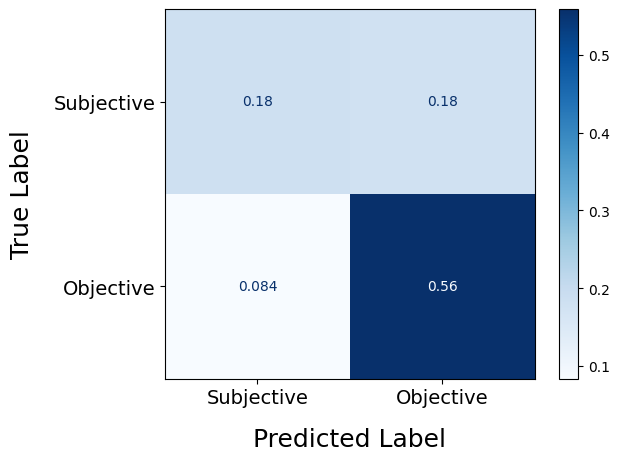

In [47]:
plot_confusion_matrix("distilmbert", test_results)

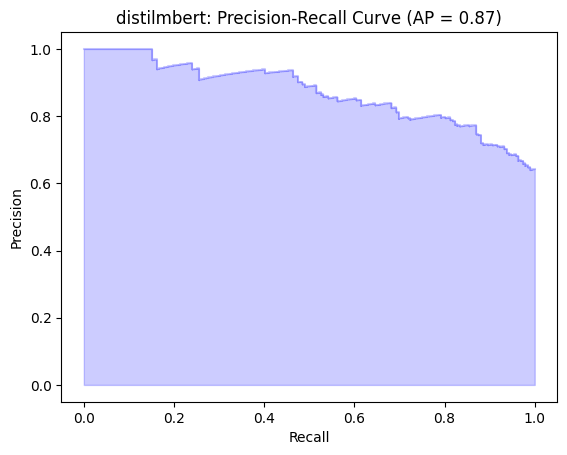

In [48]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

### Multilungual

In [21]:
# Combine Multilingual Training Data
df_train_multi = pd.concat([df_train_ar, df_train_bg, df_train_en, df_train_de, df_train_it])
df_dev_multi = pd.concat([df_dev_ar, df_dev_bg, df_dev_en, df_dev_de, df_dev_it])

In [22]:
dataset_train = Dataset.from_pandas(df_train_multi)
dataset_val = Dataset.from_pandas(df_dev_multi)
dataset_test = Dataset.from_pandas(df_test_multi)

In [23]:
# Tokenization
tokenized_train = dataset_train.map(preprocess_function, batched=True)
tokenized_val = dataset_val.map(preprocess_function, batched=True)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

Map:   0%|          | 0/6380 [00:00<?, ? examples/s]

Map:   0%|          | 0/2393 [00:00<?, ? examples/s]

Map:   0%|          | 0/1982 [00:00<?, ? examples/s]

In [24]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-24-eb8653a7a6bc>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [25]:
# Training
trainer.train()

Epoch,Training Loss,Validation Loss,F1 Macro
1,No log,0.543569,0.693901
2,0.564300,0.606795,0.691821
3,0.428500,0.692638,0.689077


TrainOutput(global_step=1197, training_loss=0.4739040862348743, metrics={'train_runtime': 998.1324, 'train_samples_per_second': 19.176, 'train_steps_per_second': 1.199, 'total_flos': 2531153936669184.0, 'train_loss': 0.4739040862348743, 'epoch': 3.0})

In [26]:
log_dir = "logs"

if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove old logs entirely

In [27]:
# Evaluation
val_metrics = trainer.evaluate()
print("Validation Metrics:", val_metrics)

Validation Metrics: {'eval_loss': 0.5435693264007568, 'eval_f1_macro': 0.6939009043891916, 'eval_runtime': 15.8564, 'eval_samples_per_second': 150.917, 'eval_steps_per_second': 9.46, 'epoch': 3.0}


In [28]:
# Save model
trainer.save_model("distilmbert-subjectivity-multi")

In [29]:
# Multilingual Test Predictions
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_multi["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission.to_csv("multilingual_test_predictions.tsv", sep="\t", index=False)

In [30]:
# Run scorer
# !python scorer/evaluate.py -g data/multilingual/test_multilingual_labeled.tsv -p multilingual_test_predictions.tsv
!python clef2025-checkthat-lab/task1/scorer/evaluate.py \
    -g clef2025-checkthat-lab/task1/data/multilingual/test_multilingual_labeled.tsv \
    -p multilingual_test_predictions.tsv

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6823
            macro-P: 0.6963
            macro-R: 0.6747
            
            SUBJ-F1: 0.5456
            SUBJ-P: 0.6039
            SUBJ-R: 0.4976
            
            accuracy: 0.7412
        


#### Error Analysis

In [31]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

In [32]:
# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_multi["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

In [33]:
false_positives = test_results[test_results["error_type"] == "False Positive"]
print(f"Number of False Positives (distilmbert): {false_positives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_positives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Positives (distilmbert): 311

EXAMPLES:

	To these unhappy groups, we can add a third.

	Ecco ad esempio che la Regione Liguria, guidata dalla destra, ha pensato bene di stanziare 220mila euro per un progetto di educazione allaffettività nelle parrocchie e negli oratori.

	ويتطرق عمار إلى التأثيرات المحتملة لموقف ماسك ،  أن ذلك الموقف قد يفاقم التوتر بين واشنطن وبرلين ، خاصة في ظل حساسية المرحلة الحالية مع اقتراب الانتخابات في ألمانيا.

	Lone shoppers lined the aisles in preparation for a Government-mandated 24-hour indoors, with several baskets piled with more food, booze and toilet rolls than any household could conceivably need during such a short time.

	ويبدو أن مستوى الدوري الإنجليزي بشكل عام ونسق مانشستر يونايتد القوي هو السبب الأول في تعثر خطوات المجبري في فريق الشياطين الحمر وعدم قدرته على إثبات نفسه حتى ضمن التشكيلة الاحتياطية بحسب رأي المدير الفني السابق للاتحاد التونسي لكرة القدم كمال القلصي.

	على سبيل المثال ، أصبحت بكين تتوقع من زعماء العالم النامي الموا

In [34]:
false_negatives = test_results[test_results["error_type"] == "False Negative"]
print(f"Number of False Negatives (distilmbert): {false_negatives.shape[0]}")
print("\nEXAMPLES:\n")
for ex in false_negatives.head(10).sentence:
    print(f"\t{ex}\n")

Number of False Negatives (distilmbert): 202

EXAMPLES:

	From the lack of vision, the lack of hope.

	Doch gäbe es bisher noch keine systematischen und vergleichbaren Studien zu dem Thema.

	 إلى ترامب على أنه يمثل مصالح الشركات الكبرى بشكل أفضل ( 64 بالمئة مقابل 20 ) والأثرياء ( 67 بالمئة مقابل 19 ) بهامش أوسع.

	The fuel for the far right comes from disillusionment.

	Back in the room he’s squatting in, he curls around himself, rejecting the world with his physicality.

	التحول الذي يقوده شي لقد بدأ التحول في نهج شي يصبح واضحا مع اندلاع الحرب في أوكرانيا.

	ويبدو أنه يرى روسيا كمواطنة حاسمة في هذا المسعى.

	I felt like I’d accomplished something creative for the first time in a long time.

	وهذه التحديات في صميم أولويات إيران خلال قمة البريكس الأولى المنعقدة  في روسيا.

	ففي رام الله ، قال الفلسطينيون إنه لا فرق في سياسة الديمقراطي أو الجمهوري بشأن قضيتهم.



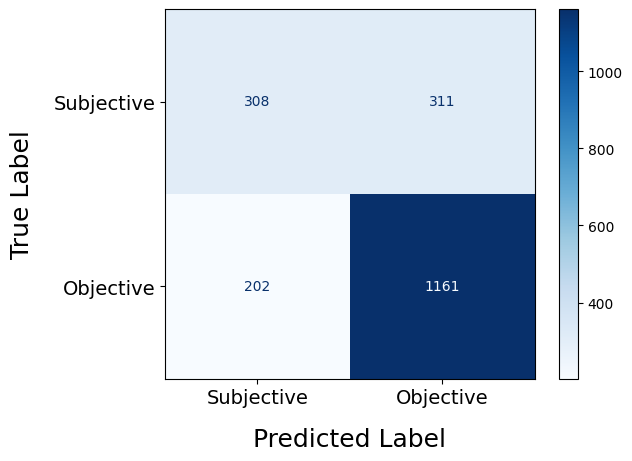

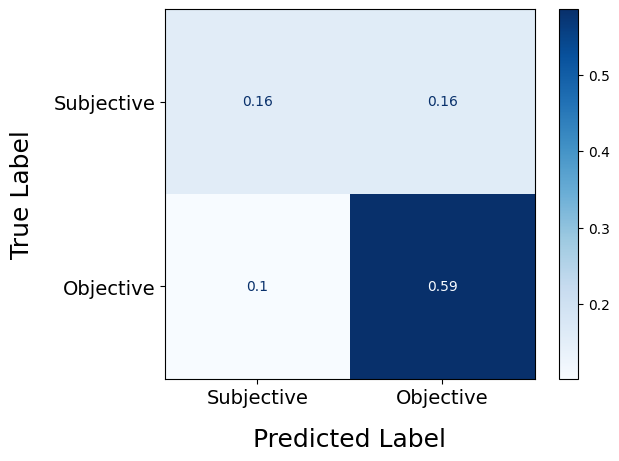

In [35]:
plot_confusion_matrix("distilmbert", test_results)

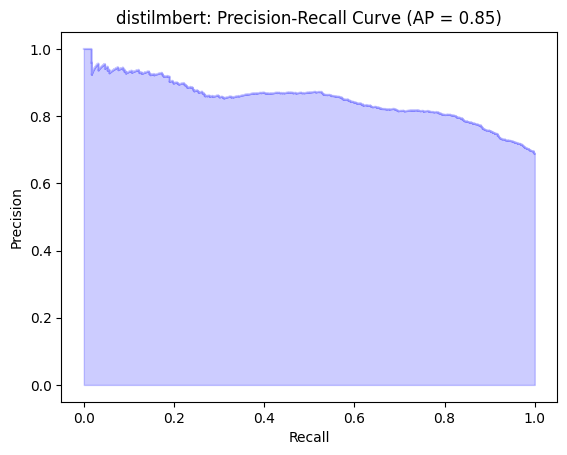

In [36]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

### Zero-Shot

In [37]:
# GREEK

In [38]:
# During testing we found that two examples are classified as "Uncertain", so we decided to not consider these results.

In [47]:
# POLISH

In [48]:
dataset_test = Dataset.from_pandas(df_test_pol)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_pol["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_pol_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/polish/test_pol_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/351 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.6443
            macro-P: 0.6811
            macro-R: 0.6504
            
            SUBJ-F1: 0.5551
            SUBJ-P: 0.7157
            SUBJ-R: 0.4534
            
            accuracy: 0.6667
        


In [49]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_pol["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

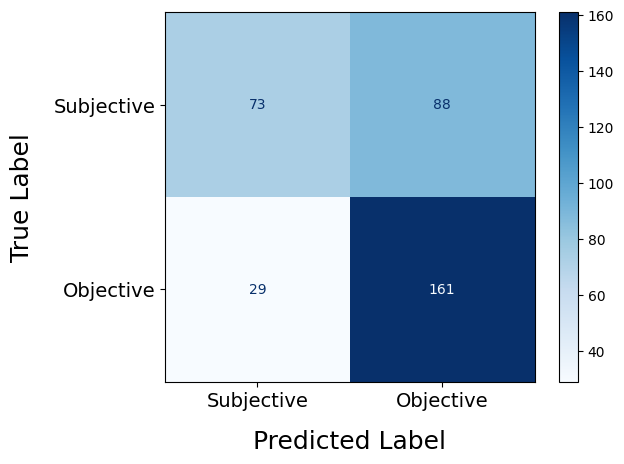

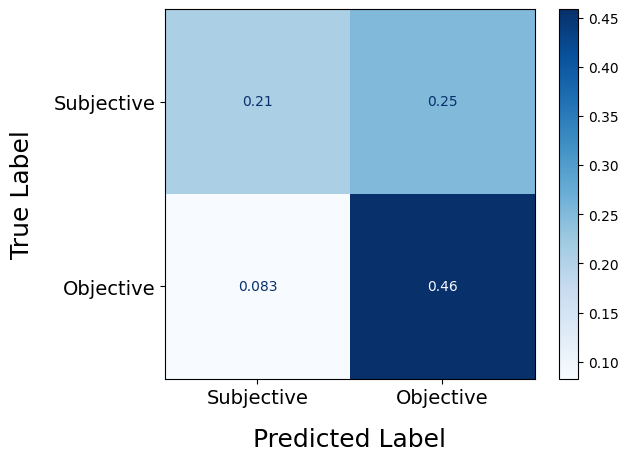

In [50]:
plot_confusion_matrix("distilmbert", test_results)

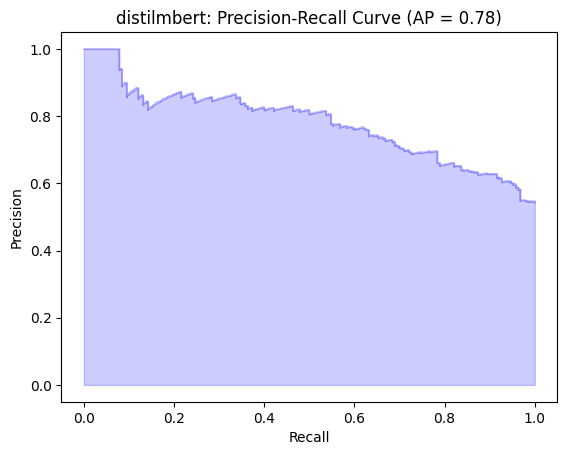

In [51]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

In [52]:
# ROMANIAN

In [53]:
dataset_test = Dataset.from_pandas(df_test_ro)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_ro["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_ro_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/romanian/test_ro_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.7791
            macro-P: 0.7743
            macro-R: 0.7845
            
            SUBJ-F1: 0.6729
            SUBJ-P: 0.6545
            SUBJ-R: 0.6923
            
            accuracy: 0.8301
        


In [54]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_ro["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

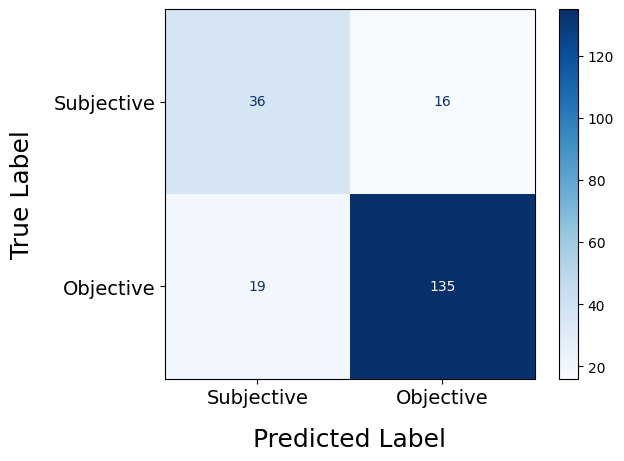

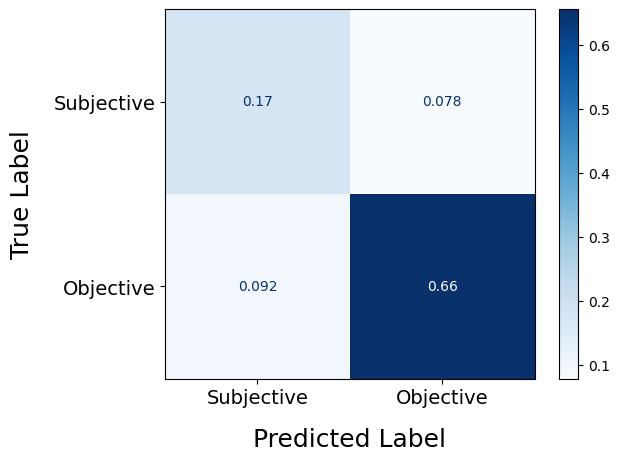

In [55]:
plot_confusion_matrix("distilmbert", test_results)

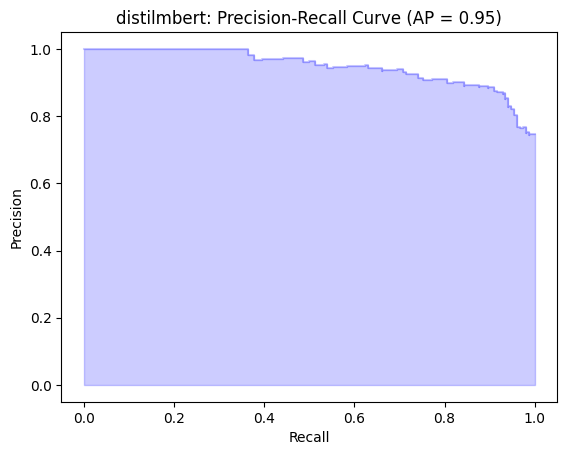

In [56]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

In [57]:
# UKRAINIAN

In [58]:
dataset_test = Dataset.from_pandas(df_test_ukr)
tokenized_test = dataset_test.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=1)

submission = pd.DataFrame({
    "sentence_id": df_test_ukr["sentence_id"],
    "label": ["OBJ" if l == 1 else "SUBJ" for l in pred_labels]
})
submission_path = "zero_shot_ukr_predictions.tsv"
submission.to_csv(submission_path, sep="\t", index=False)

ground_truth_path = "clef2025-checkthat-lab/task1/data/ukrainian/test_ukr_labeled.tsv"
!python clef2025-checkthat-lab/task1/scorer/evaluate.py -g {ground_truth_path} -p {submission_path}

Map:   0%|          | 0/297 [00:00<?, ? examples/s]

INFO : The file is properly formatted
INFO : Started evaluating results for Task 1...
INFO : 
            macro-F1: 0.5854
            macro-P: 0.5842
            macro-R: 0.5993
            
            SUBJ-F1: 0.4262
            SUBJ-P: 0.3714
            SUBJ-R: 0.5000
            
            accuracy: 0.6465
        


In [59]:
test_predictions, test_labels = predictions.predictions, predictions.label_ids

# Convert predictions and labels to pandas DataFrame (Transformer)
test_results = pd.DataFrame({
    "sentence": df_test_ukr["sentence"],
    "true_label": test_labels,
    "predicted_label": pred_labels
})

# Add a column to classify error types
test_results["error_type"] = np.where(
    test_results["true_label"] == test_results["predicted_label"],
    "Correct",
    np.where(
        (test_results["true_label"] == 1) & (test_results["predicted_label"] == 0),
        "False Negative",
        "False Positive"
    )
)

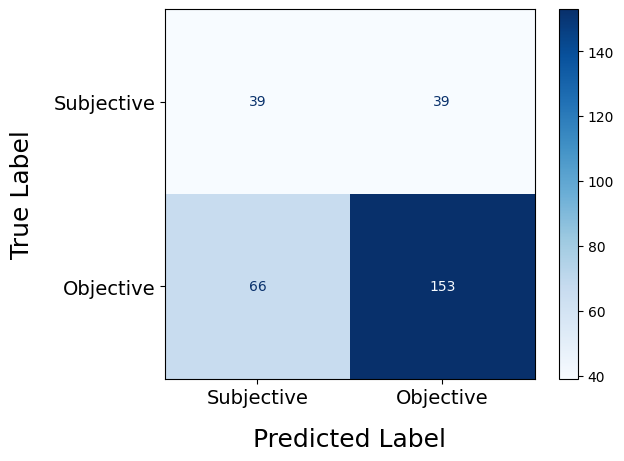

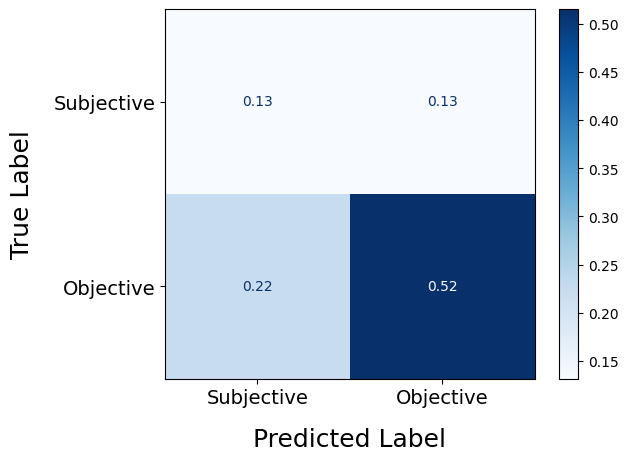

In [60]:
plot_confusion_matrix("distilmbert", test_results)

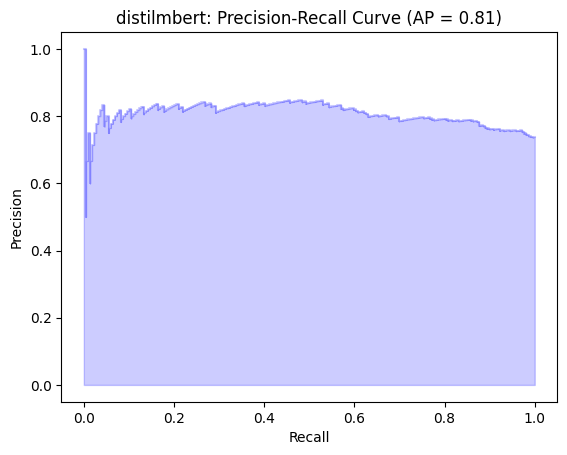

In [61]:
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions[:, 1])
average_precision = average_precision_score(test_labels, test_predictions[:, 1])

# Plot the Precision-Recall curve
plot_precision_recall_curve("distilmbert", precision, recall, average_precision)

## Solution Download

In [62]:
!zip -r distilmbert_models.zip distilmbert-subjectivity-en distilmbert-subjectivity-it distilmbert-subjectivity-multi

	zip warning: name not matched: distilmbert-subjectivity-en
	zip warning: name not matched: distilmbert-subjectivity-it
  adding: distilmbert-subjectivity-multi/ (stored 0%)
  adding: distilmbert-subjectivity-multi/special_tokens_map.json (deflated 42%)
  adding: distilmbert-subjectivity-multi/tokenizer_config.json (deflated 75%)
  adding: distilmbert-subjectivity-multi/model.safetensors (deflated 7%)
  adding: distilmbert-subjectivity-multi/training_args.bin (deflated 52%)
  adding: distilmbert-subjectivity-multi/config.json (deflated 45%)
  adding: distilmbert-subjectivity-multi/tokenizer.json (deflated 67%)
  adding: distilmbert-subjectivity-multi/vocab.txt (deflated 45%)


In [63]:
!zip distilmbert_predictions.zip \
mono_en_test_predictions.tsv \
mono_it_test_predictions.tsv \
multilingual_test_predictions.tsv \
zero_shot_gr_predictions.tsv \
zero_shot_pol_predictions.tsv \
zero_shot_ro_predictions.tsv \
zero_shot_ukr_predictions.tsv

	zip warning: name not matched: mono_en_test_predictions.tsv
	zip warning: name not matched: mono_it_test_predictions.tsv
  adding: multilingual_test_predictions.tsv (deflated 45%)
  adding: zero_shot_gr_predictions.tsv (deflated 45%)
  adding: zero_shot_pol_predictions.tsv (deflated 46%)
  adding: zero_shot_ro_predictions.tsv (deflated 45%)
  adding: zero_shot_ukr_predictions.tsv (deflated 46%)


In [64]:
from google.colab import files

# Download the zipped folders
files.download("distilmbert_models.zip")

# Download the zipped predictions
files.download("distilmbert_predictions.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>